In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import random

In [17]:
import gym
env = gym.make('MountainCar-v0')

In [19]:
env.action_space.n

3

In [20]:
env.action_space.n

3

In [22]:
env.observation_space.high

array([0.6 , 0.07], dtype=float32)

In [23]:
env.observation_space.low

array([-1.2 , -0.07], dtype=float32)

In [25]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [31]:
print(env.reset())

[-0.47138582  0.        ]


In [35]:
print(env.step(2))

(array([-0.47077582,  0.00061   ]), -1.0, False, {})


In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
env.reset()

array([-0.53600462,  0.        ])

In [76]:
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    reward_list = []
    ave_reward_list = []
    reduction = (epsilon - min_eps)/episodes
    
    for i in range(episodes):
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            if i >= (episodes - 20):
                env.render()
                
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            state2, reward, done, info = env.step(action) 
            
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                
            tot_reward += reward
            state_adj = state2_adj
            
            if epsilon > min_eps:
                epsilon -= reduction
                
            
            reward_list.append(tot_reward)
        
    
            if (i+1) % 100 == 0:
                ave_reward = np.mean(reward_list)
                ave_reward_list.append(ave_reward)
                reward_list = []
            
            if (i+1) % 100 == 0:    
                print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list
        
    

In [85]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 200)

Episode 100 Average Reward: -100.49497500126256
Episode 100 Average Reward: -2.0
Episode 100 Average Reward: -3.0
Episode 100 Average Reward: -4.0
Episode 100 Average Reward: -5.0
Episode 100 Average Reward: -6.0
Episode 100 Average Reward: -7.0
Episode 100 Average Reward: -8.0
Episode 100 Average Reward: -9.0
Episode 100 Average Reward: -10.0
Episode 100 Average Reward: -11.0
Episode 100 Average Reward: -12.0
Episode 100 Average Reward: -13.0
Episode 100 Average Reward: -14.0
Episode 100 Average Reward: -15.0
Episode 100 Average Reward: -16.0
Episode 100 Average Reward: -17.0
Episode 100 Average Reward: -18.0
Episode 100 Average Reward: -19.0
Episode 100 Average Reward: -20.0
Episode 100 Average Reward: -21.0
Episode 100 Average Reward: -22.0
Episode 100 Average Reward: -23.0
Episode 100 Average Reward: -24.0
Episode 100 Average Reward: -25.0
Episode 100 Average Reward: -26.0
Episode 100 Average Reward: -27.0
Episode 100 Average Reward: -28.0
Episode 100 Average Reward: -29.0
Episode 

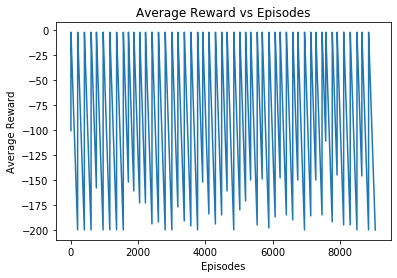

In [82]:
plt.plot((np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
     

plt.show()

In [73]:
state_adj = (env.reset() - env.observation_space.low)*np.array([10, 100])
state_adj = np.round(state_adj, 0).astype(int)

In [74]:
state_adj

array([6, 7])

In [47]:
env.observation_space.high - env.observation_space.low

array([1.8000001, 0.14     ], dtype=float32)

In [38]:
num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])

In [40]:
num_states = np.round(num_states, 0).astype(int) + 1

In [42]:
num_states

array([19, 15])

In [45]:
env.action_space.n

3

In [43]:
Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1],env.action_space.n))

In [44]:
Q

array([[[ 5.43620385e-01, -7.44004824e-01, -5.44549959e-01],
        [ 5.42504282e-01,  1.30608500e-01, -2.06217451e-01],
        [-1.11875480e-01, -8.22016151e-02, -7.01591749e-01],
        [-9.73977200e-01,  6.50813249e-02,  6.04481429e-01],
        [ 4.25087642e-01, -2.43321515e-01,  8.59253315e-01],
        [-3.34991748e-02,  3.41579231e-01,  2.91619018e-01],
        [ 3.14892646e-02,  7.19857279e-01, -3.80083254e-01],
        [ 9.78854996e-01, -3.23482506e-01, -8.98016416e-01],
        [ 9.95114219e-01,  6.04007148e-01, -3.46014976e-01],
        [-2.45459368e-01, -9.21660951e-02, -9.40310220e-01],
        [ 7.90267350e-01,  1.35544637e-01,  5.80552123e-01],
        [ 3.55484043e-01, -3.75910719e-01, -2.98993801e-01],
        [-1.70337741e-01, -1.76130752e-01, -2.01194333e-01],
        [-7.45499298e-01, -8.84850941e-01,  8.87814265e-01],
        [ 2.85460141e-01, -7.01408398e-01,  6.57859329e-01]],

       [[ 5.90732944e-02, -5.72707088e-02,  2.01950929e-01],
        [-4.14367542e-

In [46]:
Q.shape

(19, 15, 3)

In [4]:
import gym
env = gym.make('Acrobot-v1')
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
#         env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

[ 0.99948935 -0.03195386  0.9999718   0.00751022 -0.09984125 -0.05414485]
[ 0.99817556 -0.06037832  0.99963553  0.02699631 -0.17820127  0.24099076]
[ 0.99503423 -0.09953334  0.99517236  0.09814263 -0.20433972  0.45341367]
[ 0.99054948 -0.13715584  0.98018764  0.19807119 -0.16367623  0.53416188]
[ 0.98906339 -0.14749108  0.96413564  0.26540999  0.06283293  0.14611684]
[ 0.99499397 -0.09993499  0.97529212  0.22091917  0.40530849 -0.59016132]
[ 0.99979858 -0.02006987  0.99359623  0.11298907  0.37538235 -0.47379813]
[ 0.99844203  0.05579887  0.99994413  0.01057095  0.36503521 -0.52324951]
[ 0.99132524  0.13143164  0.99301356 -0.11800034  0.37525125 -0.73081883]
[ 0.98049969  0.19652061  0.96465353 -0.26352147  0.26681748 -0.7178584 ]
[ 0.97874289  0.2050911   0.94755555 -0.31959111 -0.18142347  0.14008805]
[ 0.99177837  0.12796747  0.97716993 -0.21245923 -0.58258101  0.94369495]
[ 0.99988666 -0.0150555   0.99945699  0.03295024 -0.81403364  1.46068846]
[ 0.98825739 -0.15279834  0.96377368  

[ 0.9977759  -0.0666578   0.98309865 -0.1830766   0.24447301 -1.67658955]
[ 0.99948953 -0.03194794  0.89705076 -0.44192753  0.09083848 -1.01530679]
[ 0.99980273 -0.01986227  0.81849964 -0.57450704  0.02758802 -0.50884305]
[ 0.9999594  -0.00901103  0.77201296 -0.63560679  0.07861116 -0.24917329]
[ 0.99990488 -0.01379213  0.7988198  -0.60157038 -0.12652058  0.67898855]
[ 0.9989398  -0.04603569  0.89818805 -0.43961146 -0.18903758  1.19786399]
[ 0.99639839 -0.08479533  0.98355156 -0.18062759 -0.18394544  1.48799531]
[ 0.99374317 -0.11168936  0.99327083  0.11581476 -0.06796553  1.42879716]
[ 0.99439714 -0.10570873  0.9333184   0.35904981  0.13551195  1.04071245]
[ 0.99753705 -0.0701415   0.85065048  0.52573164  0.21865048  0.80006865]
[ 0.99977575 -0.02117655  0.77661668  0.62997344  0.26163231  0.47333059]
[0.99955923 0.02968748 0.73643355 0.67650988 0.23516992 0.1461979 ]
[ 0.99766216  0.06833892  0.73644347  0.67649909  0.14304147 -0.13813794]
[ 0.99536368  0.09618285  0.79012702  0.6129

[ 0.99525658 -0.09728485  0.99593678  0.09005519 -0.07704923  0.22390206]
[ 0.99377008 -0.1114497   0.9889336   0.14835883 -0.06058148  0.35094792]
[ 0.99284068 -0.11944618  0.97482972  0.2229507  -0.01586492  0.3940253 ]
[ 0.99462745 -0.10351929  0.96456566  0.26384292  0.17364972  0.02373469]
[ 0.9992     -0.03999196  0.979632    0.20080124  0.44855608 -0.65182966]
[ 0.99917708  0.04056067  0.99607256  0.08854073  0.33734408 -0.45110947]
[ 0.99611875  0.08801953  0.99946965  0.03256396  0.12714796 -0.09309379]
[ 0.99603823  0.08892602  0.99851822  0.0544184  -0.11721197  0.30763139]
[ 0.99903495  0.04392237  0.98879107  0.14930582 -0.32136805  0.62237101]
[ 0.99981031 -0.01947681  0.96727471  0.25373143 -0.29704001  0.41706224]
[ 0.99663471 -0.08197103  0.94238307  0.33453571 -0.31369607  0.40497826]
[ 0.99037148 -0.13843526  0.91741722  0.39792667 -0.24138966  0.25741246]
[ 0.98898873 -0.14799085  0.93177741  0.36303012  0.14624481 -0.63073204]
[ 0.99401366 -0.10925585  0.9729814   

[ 0.97578708  0.21872258  0.96190838 -0.27337204 -0.30415599  0.44452192]
[ 0.99141386  0.13076146  0.98956288 -0.1441017  -0.56779379  0.84335201]
[ 0.99996367 -0.00852371  0.99711183  0.07594739 -0.79307465  1.30142824]
[ 0.98782158 -0.15559092  0.95155784  0.30746979 -0.64729666  1.00101958]
[ 0.96440648 -0.26442417  0.88282702  0.46969827 -0.44040785  0.72077001]
[ 0.99887618 -0.04739601  0.99958133  0.02893379 -0.03109096  0.04230994]
[ 0.99889408 -0.04701726  0.99956286  0.02956491  0.0347442  -0.03591228]
[ 0.99978152 -0.02090235  0.99982336 -0.01879504  0.21949961 -0.43488111]
[ 0.99995435  0.00955486  0.99775468 -0.06697456  0.07768933 -0.03494588]
[ 0.9997577   0.02201243  0.99785592 -0.06544886  0.04447152  0.05179241]
[ 0.99964282  0.02672498  0.99892151 -0.04643076  0.00235344  0.13603853]
[ 0.99933354  0.03650309  0.9988857  -0.04719487  0.09332096 -0.14174554]
[ 0.99806802  0.06213067  0.9950032  -0.099843    0.1562716  -0.37284216]
[ 0.99761588  0.06901134  0.99271154 -

In [9]:
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [124]:
rewards_all_episodes = []

for episode in range(num_episodes):
    done=False
    state = env.reset()
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        #Exploration and Explotation Trade 
        exploration_rate_threshold = random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])
        else :
            action = env.action_space.sample()
        
        new_state,reward,done,info = env.step(action)
         
        #Update Q table for Q(s,a)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state;
        
        rewards_current_episode += reward
        
        if done == True :
            break
            
    # Exploration Rate Decay
#     exploration_rate = min_exploration_rate + \(max_exploration_rate-min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    

IndexError: arrays used as indices must be of integer (or boolean) type

In [100]:
import time
from IPython.display import clear_output

In [101]:
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
count = 1000

for r in rewards_per_thousand_episodes:
    print(count,':',str(sum(r/1000)))
    count+=1000
    
print(q_table)

1000 : 0
2000 : 0
3000 : 0
4000 : 0
5000 : 0
6000 : 0
7000 : 0
8000 : 0
9000 : 0
10000 : 0
[[-0.02677023 -0.07103363 -0.04534463 -0.05617716 -0.04927257 -0.01778555
  -0.08902277 -0.06054859  0.00711488  0.01342774 -0.01967576 -0.04201546
  -0.0211274  -0.05123044 -0.04997615 -0.0636879  -0.040968   -0.05631932
   0.01926931 -0.10986175  0.01504317 -0.03862704 -0.02469355 -0.02884112
  -0.02315556 -0.04242046  0.01381923 -0.0715186  -0.01865572 -0.06494163
  -0.15370788  0.01703344 -0.02331793 -0.00888623 -0.00815549 -0.03996209
  -0.08554512  0.02177188]]


In [103]:
for _ in range(1000):
#     env.render()
    env.step(env.action_space.sample()) # take a random action
env.close()

In [3]:
import numpy as np
env = gym.make('Acrobot-v1')
env.seed(110)
np.random.seed(10)


class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0
        self.gamma = .95
        self.batch_size = 64
        self.epsilon_min = .01
        self.lr = 0.001
        self.epsilon_decay = .995
        self.memory = deque(maxlen=100000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(20, input_dim=self.state_space, activation=relu))
        model.add(Dense(25, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        model.compile(loss='mse', optimizer=adam(lr=self.lr))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)

        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def get_reward(state):

    if state[0] >= 0.5:
        print("Car has reached the goal")
        return 10
    if state[0] > -0.4:
        return (1+state[0])**2
    return 0


def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 2))
        score = 0
        max_steps = 1000
        for i in range(max_steps):
            action = agent.act(state)
            env.render()
            next_state, reward, done, _ = env.step(action)
            reward = get_reward(next_state)
            score += reward
            next_state = np.reshape(next_state, (1, 2))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
    return loss


def random_policy(episode, step):

    for i_episode in range(episode):
        env.reset()
        for t in range(step):
            env.render()
            action = env.action_space.sample()
            state, reward, done, info = env.step(action)
            if done:
                print("Episode finished after {} timesteps".format(t+1))
                break
            print("Starting next episode")


if __name__ == '__main__':

    print(env.observation_space)
    print(env.action_space)
    episodes = 60
    loss = train_dqn(episodes)
    plt.plot([i+1 for i in range(episodes)], loss)
    plt.show()

Box(6,)
Discrete(3)


ValueError: cannot reshape array of size 6 into shape (1,2)

In [2]:
import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear

Using TensorFlow backend.
